In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

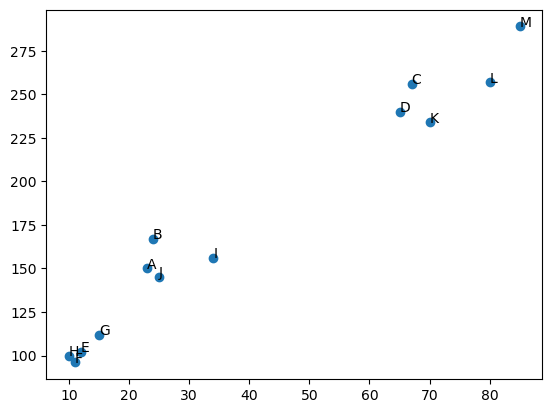

In [3]:
df = pd.read_csv("C:/Python/Datasets/simp_clust.csv", index_col=0)
plt.scatter(df['X1'],df['X2'])
for i in range(0,df.shape[0]):
    plt.text(x=df['X1'].values[i], y=df['X2'].values[i], s=list(df.index)[i])
plt.show()

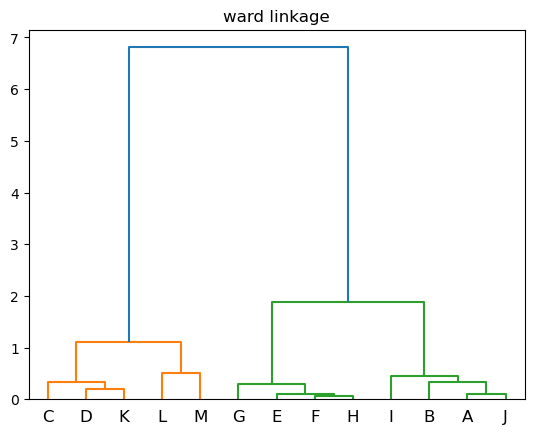

In [7]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "ward"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings, labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.show()

`sklearn` options

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [14]:
clust = AgglomerativeClustering(n_clusters=2)
clust.fit(df_scaled)
clust.labels_

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [15]:
df_copy = df.copy()
df_copy['label'] = clust.labels_
df_copy.sort_values('label')

,X1,X2,label
Name,,,
A,23,150,0
B,24,167,0
E,12,102,0
F,11,96,0
G,15,112,0
H,10,100,0
I,34,156,0
J,25,145,0
C,67,256,1


In [23]:
clusters = [2,3,4,5,6,7]
linkages = ['ward','single','complete','average']
scores = []
for c in clusters:
    for l in linkages:
        clust = AgglomerativeClustering(n_clusters=c, linkage=l )
        clust.fit(df_scaled)
        scores.append([c, l,silhouette_score(df_scaled, clust.labels_)])
df_scores = pd.DataFrame( scores, columns=['clusters','linkage' ,'score'] )
df_scores.sort_values('score', ascending=False)

,clusters,linkage,score
0,2,ward,0.768625
2,2,complete,0.768625
3,2,average,0.768625
1,2,single,0.768625
4,3,ward,0.748692
5,3,single,0.748692
6,3,complete,0.748692
7,3,average,0.748692
8,4,ward,0.642185
10,4,complete,0.642185


#### Milk

In [26]:
milk = pd.read_csv("C:/Python/Datasets/milk.csv", index_col=0)
milk_scaled = scaler.fit_transform(milk)

In [ ]:
clusters = [2,3,4,5,6,7]
linkages = ['ward','single','complete','average']
scores = []
for c in clusters:
    for l in linkages:
        clust = AgglomerativeClustering(n_clusters=c, linkage=l )
        clust.fit(milk_scaled)
        scores.append([c, l,silhouette_score(milk_scaled, clust.labels_)])
df_scores = pd.DataFrame( scores, columns=['clusters','linkage' ,'score'] )
df_scores.sort_values('score', ascending=False)

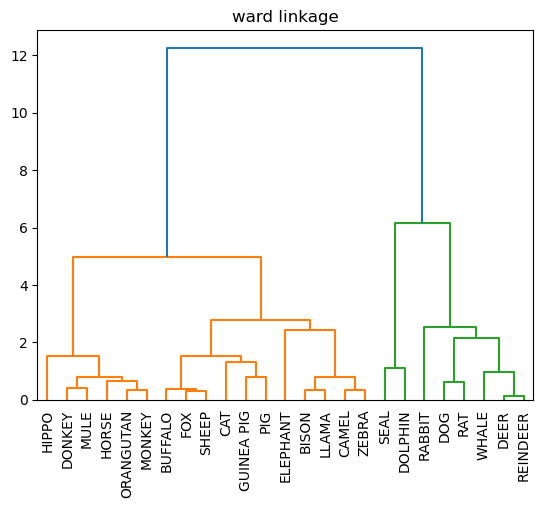

In [29]:
link = "ward"
mergings = linkage(milk_scaled,method=link)
dendrogram(mergings, labels=list(milk_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()

#### Nutrient

In [31]:
nut = pd.read_csv("C:/Python/Datasets/nutrient.csv", index_col=0)
nut_scaled = scaler.fit_transform( nut )

In [32]:
clusters = [2,3,4,5,6,7]
linkages = ['ward','single','complete','average']
scores = []
for c in clusters:
    for l in linkages:
        clust = AgglomerativeClustering(n_clusters=c, linkage=l )
        clust.fit(nut_scaled)
        scores.append([c, l,silhouette_score(nut_scaled, clust.labels_)])
df_scores = pd.DataFrame( scores, columns=['clusters','linkage' ,'score'] )
df_scores.sort_values('score', ascending=False)

,clusters,linkage,score
1,2,single,0.448342
5,3,single,0.445319
7,3,average,0.445319
8,4,ward,0.415801
10,4,complete,0.415801
3,2,average,0.413451
4,3,ward,0.403730
6,3,complete,0.403730
14,5,complete,0.400003
15,5,average,0.400003


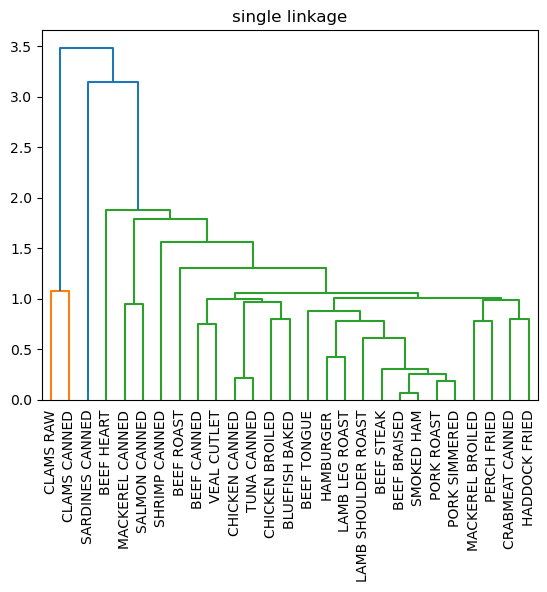

In [34]:
link = "single"
mergings = linkage(nut_scaled,method=link)
dendrogram(mergings, labels=list(nut_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()